In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from bs4 import BeautifulSoup
import requests
import time

First, import the data from CSVs and clean it.

In [50]:
# read in csvs
df_2016 = pd.read_csv("2016-stats.csv")
df_2017 = pd.read_csv("2017-stats.csv")

# get rid of goalies from both dfs
df_2016 = df_2016[df_2016.POS != "G"]
df_2017 = df_2017[df_2017.POS != "G"]

# get points from 2017 stats
df_2017["PTS"] = df_2017["G"]*10 + df_2017["A"]*6 + df_2017["CC"]*1.5 + df_2017["S"] + df_2017["SOG"] + df_2017["ACR"]*.75 + df_2017["CR"]*.25 + df_2017["PKG"]*-2 + df_2017["P"]*.15 + df_2017["TKL"] + df_2017["INT"]*.5 + df_2017["Y"]*-1.5 + df_2017["YR"]*-1.5 + df_2017["R"]*-3

# add 2017 points as column in 2016 df
data = pd.merge(df_2016, df_2017[["Player Name", "PTS"]], on="Player Name")
data = data.drop(columns=["Team"])

# get rid of any duplicates
data = data.drop_duplicates(subset=["Player Name"])

Scrape for ages of players and add them to training data.

In [51]:
# scrape for ages and add them
data["Age"] = 0

headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

ages = []

for index, row in data.iterrows():
    name = row["Player Name"]
    print(name)
    name = name.replace(" ", "+")
    url = "https://www.google.com/search?q=" + name + "+age"
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    elements = soup.select("div.Z0LcW")
    if len(elements) == 0:
        print("age not found")
        ages.append(0)
        time.sleep(1)
        continue
        
    text = soup.select("div.Z0LcW")[0].text
    try:
        age = int(text.split("\xa0")[0])
    except ValueError:
        print("age poorly formatted")
        ages.append(0)
        time.sleep(1)
        continue

    print(age)
    ages.append((age - 2))
    time.sleep(1)
    
data["Age"] = ages
data = data[data.Age != 0]
print("--------done scraping for ages--------")
print(data)

Cesar Azpilicueta
29
Steve Cook
age not found
Joel Ward
38
Gylfi Sigurdsson
29
Nathaniel Clyne
27
Jermain Defoe
36
Craig Dawson
28
Darren Fletcher
34
Stephen Ward
50
Etienne Capoue
30
Gary Cahill
33
Romelu Lukaku
25
Matthew Lowton
29
Alexis Sanchez
30
Samuel Clucas
28
Christian Eriksen
26
James Milner
32
Gareth McAuley
39
Christian Benteke
28
Eden Hazard
27
Ashley Williams
40
Nacho Monreal
32
Erik Pieters
30
Ryan Shawcross
31
Michael Keane
25
Bruno Martins Indi
26
N'Golo Kante
27
Christian Fuchs
32
Jason Puncheon
32
Diego Costa
30
Oriol Romeu
27
Dele Alli
22
Victor Wanyama
27
Adam Smith
67
Roberto Firmino
27
Charlie Daniels
82
Eric Dier
24
Wilfried Zaha
26
Ben Mee
29
Danny Simpson
31
Simon Francis
33
Joe Allen
28
Georginio Wijnaldum
28
Harry Arter
28
David Luiz
31
Jose Holebas
34
Jan Vertonghen
31
Kevin De Bruyne
27
Riyad Mahrez
27
Laurent Koscielny
33
Jamie Vardy
31
Nathan Redmond
24
Ross Barkley
25
Salomon Rondon
29
Mesut Ozil
30
Leighton Baines
34
Marten De Roon
27
Sebastian Prodl
3

32
Valere Germain
28
Opa Nguette
24
Blaise Matuidi
31
Jaroslav Plasil
36
Arnaud Souquet
26
Ivan Balliu
26
Adama Soumaoro
26
Djibril Sidibe
26
Stephane Sessegnon
34
Loic Perrin
33
Maxime Lopez
21
Alexis Blin
22
Etienne Didot
35
Valentin Rongier
24
Jordan Ikoko
24
Lassana Coulibaly
22
Thiago Motta
36
Tiemoue Bakayoko
24
Malang Sarr
19
Yann Karamoh
20
Marco Verratti
26
Igor Lewczuk
33
Rafael
32
Valentin Vada
22
Diego Contento
28
Mapou Yanga-Mbiwa
29
Ole Selnaes
24
Benjamin Mendy
24
Angel Di Maria
30
Enzo Crivelli
23
Amine Harit
21
Kevin Malcuit
27
Valentin Eysseric
26
Nicolas De Preville
27
Frederic Guilbert
23
Youssef Ait Bennasser
22
Frederic Sammaritano
32
Yann Bodiger
23
Romain Hamouma
31
Radamel Falcao
32
Mouctar Diakhaby
22
Milan Bisevac
35
Rony Lopes
22
Sanjin Prcic
25
Alassane Plea
25
Ramy Bensebaini
23
Moustapha Diallo
32
Gaetan Laborde
24
Adrien Thomasson
25
Steeve Yago
26
Gelson Fernandes
32
Serge Aurier
25
Daniel Congre
33
Alexander Djiku
24
Henri Saivet
28
Issiaga Sylla
24
Ya

21
Alvaro Morata
26
Alejandro Galvez
29
David Simon
58
Marc Roca
22
Felipe Caicedo
30
Rafa Navarro
24
Raul Garcia Carnero
29
Arda Turan
31
Faycal Fajr
30
Lucas Digne
25
Rafinha
25
John Guidetti
26
Santi Mina
23
Fernando Torres
34
Andres Iniesta
34
Sergi Samper
23
Lucas Hernandez
22
Luciano Vietto
25
James Rodriguez
27
Fabian Orellana
32
Oscar Duarte
29
Keko
31
Vicente Iborra
30
Lucas Vazquez
27
Momo
22
Stevan Jovetic
29
Denis Suarez
24
Ander Iturraspe
29
Joseba Zaldua
26
Jozabed
27
Jose Maria Gimenez
23
Charles
70
Markel Susaeta
31
Marco Asensio
22
Tito
87
Gabriel Silva
27
Nicolas Gaitan
30
Omar Ramos
30
Erik Moran
27
Carles Planas
27
Rene Krhin
28
Sime Vrsaljko
26
Litri
age not found
Adrian Marin Gomez
21
Ezequiel Ponce
21
Nabil El Zhar
32
Alvaro Medran
24
Vigaray
24
Carlos Vigaray
24
Carlos Martinez
27
Mubarak Wakaso
28
Marc Navarro
23
Angel Correa
23
Ruben Pena
27
Papakouli Diop
32
Joselu
28
Aymen Abdennour
29
Marlos Moreno
22
Giuseppe Rossi
31
Rodri
22
Aythami Artiles Oliva
32
Chri

Weston McKennie
20
Florian Baak
19
Bernard Tekpetey
21
Jan-Ingwer Callsen-Bracker
34
Arne Maier
19
Deji Ousman Beyreuther
19
Dominik Franke
20
Stefan Posch
21
Vincent Sierro
23
Pal Dardai
42
Gian-Luca Itter
19
Birk Risa
20
Alexander Isak
19
Marco Friedl
20
Jacob Bruun Larsen
20
Johannes Eggestein
20
Felix Gotze
20
Slobodan Medojevic
28
Daniel Opare
28
Francesco Acerbi
30
Gianmarco Ferrari
26
Duvan Zapata
27
Jose Maria Callejon
31
Alejandro Dario Gomez
30
Marek Hamsik
31
Ciro Immobile
28
Antonio Candreva
31
Diego Falcinelli
27
Matias Agustin Silvestre
34
Federico Fazio
31
Federico Ceccherini
26
Diego Laxalt
25
Radja Nainggolan
30
Ledian Memushaj
32
Lorenzo Insigne
27
Jasmin Kurtic
29
Gianluca Caprari
25
Andrea Belotti
25
Nicolas Burdisso
37
Elseid Hysaj
24
Mauro Icardi
25
Marco Parolo
33
Lucas Torreira
22
Andrea Masiello
32
Fabio Quagliarella
35
Valter Birsa
32
Edin Dzeko
32
Cristiano Biraghi
26
Federico Peluso
34
Davide Astori
31
Felipe Anderson
25
Milan Skriniar
23
Suso
25
Ladislav Kr

We got some errant data points in our dataset due to players that share a name with other historical figures (looking at you, Adam Smith), so we'll just get rid of data on any players whose age is 45 or more. Also let's drop the player name (we won't need it).

In [52]:
data = data[data.Age < 45]
data = data.drop(columns=["Player Name"])

Save the data to a csv if you don't wanna scrape again.

In [53]:
data.to_csv("2016_data_2017_points_ages.csv")

Recover data from a csv if you need.

In [46]:
# read in csvs
data = pd.read_csv("2016_data_2017_points_ages.csv")

For the regression, add an Age^2 term (seems logical because players improve as age increases for a while and then regress).

In [54]:
data["AgeSquared"] = data["Age"]
data["AgeSquared"] = data["AgeSquared"].apply((lambda x: x**2))

Break up stats into seperate data sets by player position.

In [55]:
# break up stats by position
d_data = data[data.POS.isin(["D", "M/D"])]
m_data = data[data.POS.isin(["M"])]
f_data = data[data.POS.isin(["F", "F/M"])]

d_data = d_data.drop(columns=["POS"])
m_data = m_data.drop(columns=["POS"])
f_data = f_data.drop(columns=["POS"])

Find a regression that works best on the test data.

Optimal number of features : 13
Test R^2 score: 0.07


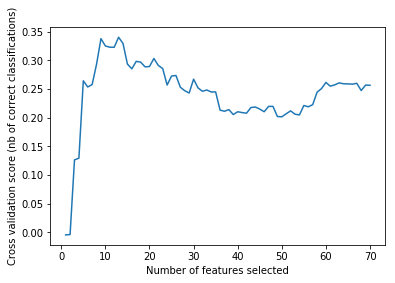

In [95]:
lm = linear_model.LinearRegression()

# linear regression for forwards
# create training and testing data
# also drop the position
xf = f_data.drop(columns=["PTS"])
yf = f_data.PTS

xf_train, xf_test, yf_train, yf_test = train_test_split(xf, yf, test_size=0.2)

best_model_so_far = None
best_r2_so_far = 0

for idx in range(0,50):
    f_model = RFECV(estimator=lm)
    f_model.fit(xf_train, yf_train)

    # print("Optimal number of features : %d" % f_model.n_features_)

    # # Plot number of features VS. cross-validation scores
    # plt.figure()
    # plt.xlabel("Number of features selected")
    # plt.ylabel("Cross validation score (nb of correct classifications)")
    # plt.plot(range(1, len(f_model.grid_scores_) + 1), f_model.grid_scores_)
    # plt.show()

    yf_pred = f_model.predict(xf_test)
    r2 = r2_score(yf_test, yf_pred)
    # print('Test R^2 score: %.2f' % r2_score(yf_test, yf_pred))
    
    if r2 > best_r2_so_far:
        best_model_so_far = f_model
        best_r2_so_far = r2
        
print("Optimal number of features : %d" % best_model_so_far.n_features_)
print('Test R^2 score: %.2f' % best_r2_so_far)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(best_model_so_far.grid_scores_) + 1), best_model_so_far.grid_scores_)
plt.show()